In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
SPOTIFY_CLIENT_ID = '2ec294682f3d4d53a0b933dc486bd294'
SPOTIFY_CLIENT_SECRET = '4c3845c0b99442239e636930b6410122'
# SPOTIFY_REDIRECT_URI = ''
auth_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)
sp.me 



<bound method Spotify.me of <spotipy.client.Spotify object at 0x000001FBB76021F0>>

GET RECOMMENDATION TOKEN


In [2]:
money_trees_song_id = '74tLlkN3rgVzRqQJgPfink'
import requests 
import base64

def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

token = get_token(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)

GET TRACK RECOMMENDATION WITH TOKEN

In [5]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recomendation_Url = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recomendation_Url, headers=headers)
    return res.json()

recommendation_json = get_track_recommendations(money_trees_song_id, token)

uris =[]
for i in recommendation_json['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"4th Dimension" by(KIDS SEE GHOSTS)
"BLEACH" by(BROCKHAMPTON)
"Bonfire" by(Childish Gambino)
"Modern Slavery" by(Huncho Jack)
"Buy The World" by(Mike WiLL Made-It)
"Easy v2" by(Baird)
"Drugstore" by(IDK)
"I Had No Idea" by(Terrace Martin)
"After The Storm (feat. Tyler, The Creator & Bootsy Collins)" by(Kali Uchis)
"Money over Love" by(Bilal)


In [7]:
recommendations_list = recommendation_json['tracks']
import pandas as pd

song_recommendations = pd.DataFrame(recommendations_list)

song_recommendations

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,153351,True,{'isrc': 'USUM71808236'},{'spotify': 'https://open.spotify.com/track/6J...,https://api.spotify.com/v1/tracks/6JyEh4kl9DLw...,6JyEh4kl9DLwmSAoNDRn5b,False,4th Dimension,69,None,3,track,spotify:track:6JyEh4kl9DLwmSAoNDRn5b
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,273151,True,{'isrc': 'USUYG1167871'},{'spotify': 'https://open.spotify.com/track/0d...,https://api.spotify.com/v1/tracks/0dWOFwdXrbBU...,0dWOFwdXrbBUYqD9DLsoyK,False,BLEACH,68,https://p.scdn.co/mp3-preview/6b37ded29a307bef...,7,track,spotify:track:0dWOFwdXrbBUYqD9DLsoyK
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,192946,True,{'isrc': 'USYAH1100339'},{'spotify': 'https://open.spotify.com/track/79...,https://api.spotify.com/v1/tracks/799f6Ih1Pu4A...,799f6Ih1Pu4AUApMyXhxUc,False,Bonfire,72,https://p.scdn.co/mp3-preview/5e933f285c6f8144...,3,track,spotify:track:799f6Ih1Pu4AUApMyXhxUc
3,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,148559,True,{'isrc': 'USUM71714095'},{'spotify': 'https://open.spotify.com/track/7J...,https://api.spotify.com/v1/tracks/7J6bnDDitOwf...,7J6bnDDitOwfelaJNixHhL,False,Modern Slavery,59,None,1,track,spotify:track:7J6bnDDitOwfelaJNixHhL
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB, B...",1,226693,True,{'isrc': 'USUM71407261'},{'spotify': 'https://open.spotify.com/track/01...,https://api.spotify.com/v1/tracks/01A7PEPSnmti...,01A7PEPSnmtixFPfB2UTal,False,Buy The World,60,None,1,track,spotify:track:01A7PEPSnmtixFPfB2UTal
5,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,175302,True,{'isrc': 'QZD5H2000403'},{'spotify': 'https://open.spotify.com/track/1Z...,https://api.spotify.com/v1/tracks/1ZNOwjcEAqka...,1ZNOwjcEAqka5feaa5dEko,False,Easy v2,58,None,1,track,spotify:track:1ZNOwjcEAqka5feaa5dEko
6,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,189826,True,{'isrc': 'USWB12201466'},{'spotify': 'https://open.spotify.com/track/65...,https://api.spotify.com/v1/tracks/65sYC4QuRyCx...,65sYC4QuRyCxk8sA01EbFs,False,Drugstore,51,https://p.scdn.co/mp3-preview/dbed7a5f496dc281...,1,track,spotify:track:65sYC4QuRyCxk8sA01EbFs
7,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,223160,True,{'isrc': 'USUYG1011859'},{'spotify': 'https://open.spotify.com/track/3O...,https://api.spotify.com/v1/tracks/3OMXlsNh8VKB...,3OMXlsNh8VKBHtueWYghSh,False,I Had No Idea,36,https://p.scdn.co/mp3-preview/0aaba1ba9512febc...,6,track,spotify:track:3OMXlsNh8VKBHtueWYghSh
8,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,207454,False,{'isrc': 'GBUM71706492'},{'spotify': 'https://open.spotify.com/track/1o...,https://api.spotify.com/v1/tracks/1otG6j1WHNvl...,1otG6j1WHNvl9WgXLWkHTo,False,"After The Storm (feat. Tyler, The Creator & Bo...",79,None,13,track,spotify:track:1otG6j1WHNvl9WgXLWkHTo
9,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AL, AM, AT, A

In [9]:
song_recommendations_short = song_recommendations[['name', 'explicit', 'duration_ms', 'popularity']]
song_recommendations_short.describe()

,duration_ms,popularity
count,10.00000,10.000000
mean,195522.80000,58.000000
std,38413.93185,15.972198
min,148559.00000,28.000000
25%,167415.00000,52.750000
50%,191386.00000,59.500000
75%,219233.50000,68.750000
max,273151.00000,79.000000


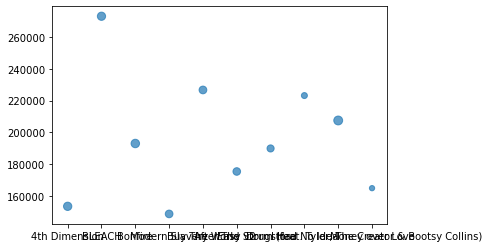

In [11]:
import matplotlib.pyplot as plt
import numpy as np

    
x = song_recommendations_short['name']
y = song_recommendations_short['duration_ms']
s = song_recommendations_short['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [ ]:
song_recommendations_short['duration_min'] = round(song_recommendations_short['duration_ms'] / 1000, 0)
song_recommendations_short["popularity_range"] = song_recommendations_short["popularity"] - (song_recommendations_short['popularity'].min() - 1)
song_recommendations_short



In [14]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No handles with labels found to put in legend.


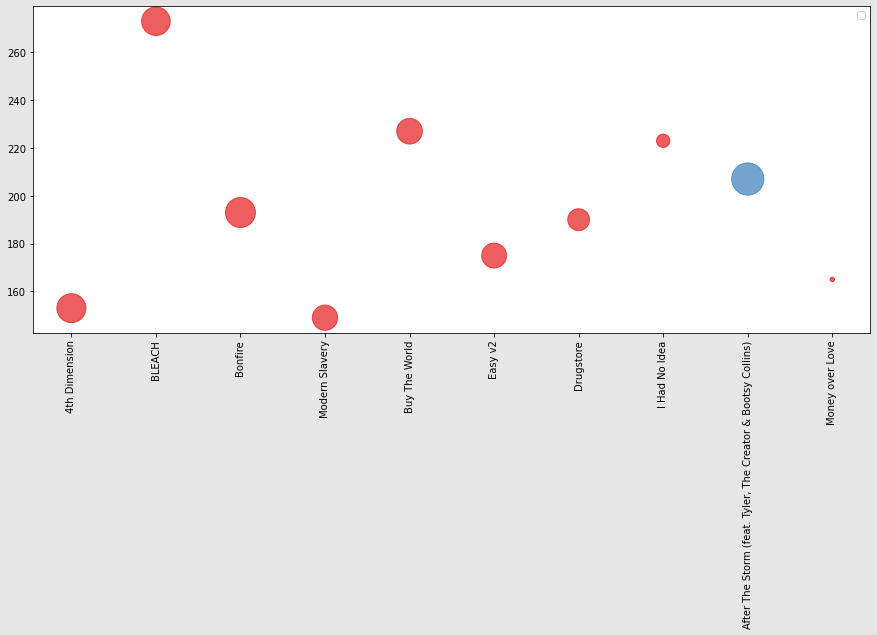

In [15]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = song_recommendations_short['name']
y = song_recommendations_short['duration_min']
s = song_recommendations_short['popularity_range']*20
    
color_labels = song_recommendations_short['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=song_recommendations_short['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()